# Problem Set 1

By Yanbin Liu

ybliu17@bu.edu

## 1. What areas of finance are of most interest to you (e.g. big data, trading, portfolio management, risk management, derivative pricing, analyzing complex derivatives)?

Answer: trading, analyzing complex derivatives, and portfolio management

## 2. What is the primary reason for your interest in this course? 

To learn more about technical stuff in the quant's work today.

## 3. List all programming languages you have used and your level of familiarity with each.

Python - familiar

C/C++ - familiar

R - entry level

Matlab - familiar

SQL - entry level

c# - entry level



## 4. Option traders often say that when buying options we get gamma at the expense of theta. What do you think they mean?

In the Black-Sholes basic equation, we have the following:

$\frac{\partial f}{\partial t} + \frac{\partial f}{\partial S}S + \frac{1}{2}\sigma^2S^2\frac{\partial^2 f}{\partial S^2}-rf = 0$

The gamma is $\frac{\partial^2 f}{\partial S^2}$, and the theta is the part $\frac{\partial f}{\partial t}$. The value of the options vanishes as time passes by, which is expressed with a negative theta. And the options(call) have a positive gamma. If we do delta hedge, then the dynamic value of the options depends only on the relative between theta and gamma, which are negative and positive respectively.

## 5. Consider the CEV Model:

$dS_t = rS_tdt+\sigma S_t^\beta W_t$

Assume a CEV model that is defined by the following parameters:

$S_0 = 100$

$r = 0.0$

$\beta = 1.0$

$\sigma=0.25$


### (a) Describe what each model parameter does.

The $r$ is the risk-free rate, which drives the market

The $S_0$ is the initial value of the underlying asset

The $\beta$ makes the volatility changes in power order along with the change of $S$

The $\sigma$ is the volatility multiplier of the asset.

### (b) Price an at-the-money one year European call option via Monte Carlo simulation. (HINT: Increments of Brownian Motion are distributed normally with mean 0 and variance dt. One approach is to construct a set of paths by generating random normal variables to use as the increments of the Brownian Motion)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

In [3]:
S0, r, beta, sig, K, t = 100, 0.0, 1.0, 0.25, 100, 1
n, m = 10000, 10000 # numbers of trials and numbers of intervals

In [4]:
S = np.ones(n) * S0
dt = t/m

for i in range(n):
    rdn = np.random.randn(n)
    dS = r * S * dt + sig * np.power(S, beta) * rdn * np.sqrt(dt)
    S += dS
    
np.mean(np.maximum(0, S-K))

9.73093036241464

### (c) Calculate the price of the same European call option via the Black-Scholes formula. Is this price the same as you obtained via simulation? Should it be? Why or why not?


In [5]:
from scipy.stats import norm

In [6]:
d1 = (np.log(S0/K)+(r+sig**2/2)) / sig
d2 = d1 - sig

C = S0 * norm.cdf(d1) - K * np.exp(-r) * norm.cdf(d2)
C

9.94764496602258

It is not the same because there is error in simulation, but they are therotically the same.

### (d) In the Black-Scholes model, we know that the delta of a European call option is:

$\Delta = \Phi(d1)$

$d1 = \frac{1}{\sigma\sqrt(T)} (ln\frac{S_0}{K} + (r+\frac{\sigma^2}{2}T))$

Calculate the delta of an at-the-money European call option with one year to expiry.

In [7]:
d1 = (np.log(S0/K)+(r+sig**2/2)) / sig

delta = norm.cdf(d1)
delta

0.5497382248301129

### (e) Using the delta obtained above, calculate how many shares of stock you need to con- struct a delta neutral portfolio that is long one unit of the call option and short ∆ shares of the stock?

In [8]:
delta

0.5497382248301129

###  (f) Use simulation to estimate the payoff of the delta neutral portfolio obtained above. How does the payoff compare to the Black-Scholes model price of the option you obtained earlier? What conditions cause this portfolio to make money? Lose money?

suppose the we do not do rolling delta hedge

In [55]:
S0, r, beta, sig, K, t = 100, 0.0, 1.0, 0.25, 100, 1
n, m = 10000, 10000 # numbers of trials and numbers of intervals

In [56]:
S_0 = np.ones(n) * S0
S = np.ones(n) * S0
dt = t/m

for i in range(n):
    rdn = np.random.randn(n)
    dS = r * S * dt + sig * np.power(S, beta) * rdn * np.sqrt(dt)
    S += dS


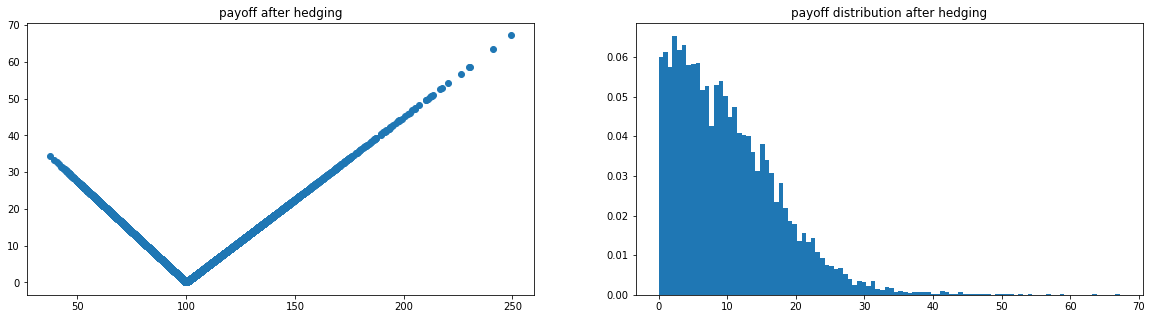

In [58]:
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(121)
plt.title('payoff after hedging')

ax2 = fig.add_subplot(122)
ax1.scatter(S, np.maximum(0, S-K) - delta * (S-S_0))
plt.title('payoff distribution after hedging')
ax2.hist(np.maximum(0, S-K) - delta * (S-S_0), bins=100, density=True)

plt.show()

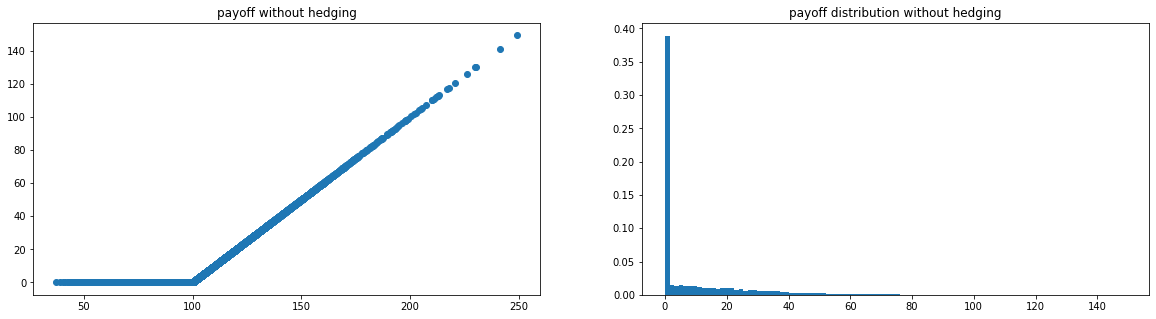

In [59]:
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(121)
plt.title('payoff without hedging')
ax2 = fig.add_subplot(122)
ax1.scatter(S, np.maximum(0, S-K))
plt.title('payoff distribution without hedging')
ax2.hist(np.maximum(0, S-K), bins=100, density=True)

plt.show()

The payoff function and the payoff distribution are different after hedging. However, they have the same expectation since the expectation of hedging position is zero. 

So after hedging, when the $S_T$ is between 121.6 and 82.3, the strategy loses money, and otherwises gains money

Then we can consider rolling delta hedging.

In [8]:
S0, r, beta, sig, K, t = 100, 0.0, 1.0, 0.25, 100, 1
n, m = 10000, 10000 # numbers of trials and numbers of intervals

In [60]:
S_0 = np.ones(n) * S0
S = np.ones(n) * S0
dt = t/m

hedging_pnl = np.ones(n)

for i in range(n):
    d1 = (np.log(S2/K)+(r+sig**2/2*(1-i*dt))) / (sig * np.sqrt(1-i*dt))
    delta1 = norm.cdf(d1) # the number of underlying to buy in the current time
    
    rdn = np.random.randn(n)
    dS = r * S * dt + sig * np.power(S, beta) * rdn * np.sqrt(dt)
    S += dS
    
    hedging_pnl -= dS * delta1 


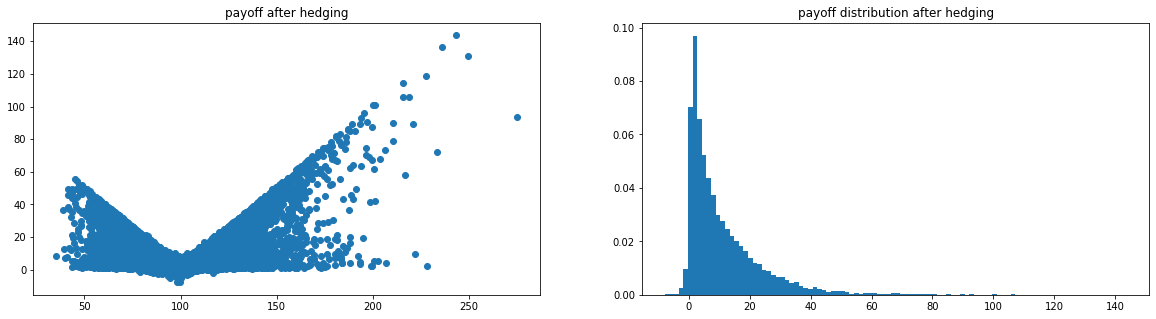

In [61]:
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(121)
plt.title('payoff after hedging')

ax2 = fig.add_subplot(122)
ax1.scatter(S, np.maximum(0, S-K) + hedging_pnl)
plt.title('payoff distribution after hedging')
ax2.hist(np.maximum(0, S-K) + hedging_pnl, bins=100, density=True)

plt.show()

In [62]:
np.mean(np.maximum(0, S-K) + hedging_pnl)

11.151007745623941

It shows that unlike hedging in the begining, the rolling delta hedging actually increase the value of the portfolio comparing to the portfolio without hedging.

To be simplified, in the following we only perform hedging in the beginning.

### (g) Modify the model dynamics so that β = 0.5 and all other parameters are the same as in the original question. Using the same hedging portfolio perform another simulation to estimate the payoffs of the delta-neutral portfolio under these dynamics. Are the payoffs higher or lower? Why?

In [65]:
S0, r, beta, sig, K, t = 100, 0.0, 0.5, 0.25, 100, 1
n, m = 10000, 10000 # numbers of trials and numbers of intervals

In [66]:
S_0 = np.ones(n) * S0
S = np.ones(n) * S0
dt = t/m

for i in range(n):
    rdn = np.random.randn(n)
    dS = r * S * dt + sig * np.power(S, beta) * rdn * np.sqrt(dt)
    S += dS
    
np.mean(np.maximum(0, S-K) - delta * (S-S_0))

0.9997083527535073

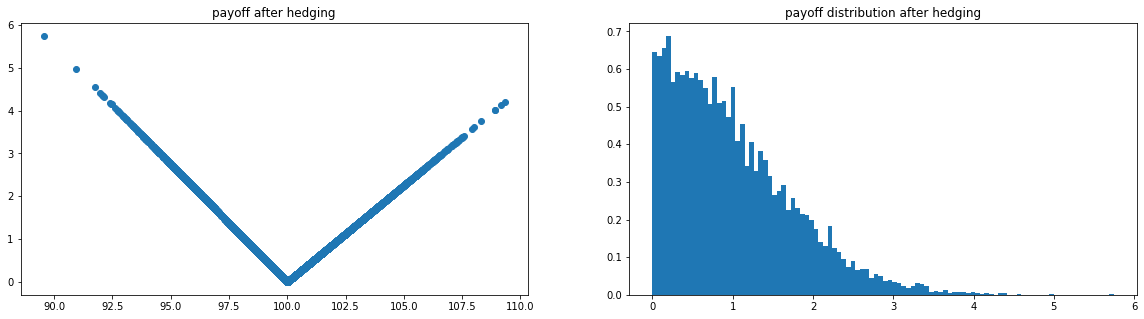

In [67]:
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(121)
plt.title('payoff after hedging')

ax2 = fig.add_subplot(122)
ax1.scatter(S, np.maximum(0, S-K) - delta * (S-S_0))
plt.title('payoff distribution after hedging')
ax2.hist(np.maximum(0, S-K) - delta * (S-S_0), bins=100, density=True)

plt.show()

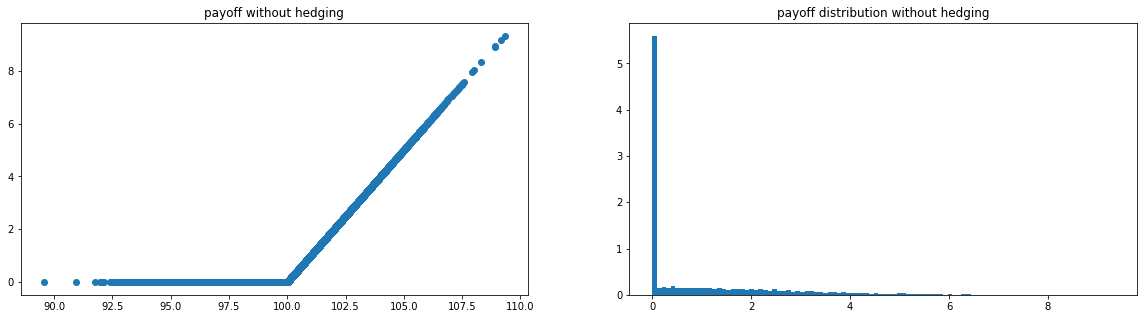

In [68]:
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(121)
plt.title('payoff without hedging')
ax2 = fig.add_subplot(122)
ax1.scatter(S, np.maximum(0, S-K))
plt.title('payoff distribution without hedging')
ax2.hist(np.maximum(0, S-K), bins=100, density=True)

plt.show()

it is lower because the option has lower volatility compensation.

### (h) Modify the model dynamics so that σ = 0.4 and all other parameters are the same as in the original question. Using the same hedging portfolio perform another simulation to estimate the payoffs of the delta-neutral portfolio under these dynamics. Explain the relationship between a delta-neutral portfolio and the σ parameter.

In [69]:
S0, r, beta, sig, K, t = 100, 0.0, 1.0, 0.4, 100, 1
n, m = 10000, 10000 # numbers of trials and numbers of intervals

In [70]:
S_0 = np.ones(n) * S0
S = np.ones(n) * S0
dt = t/m

for i in range(n):
    rdn = np.random.randn(n)
    dS = r * S * dt + sig * np.power(S, beta) * rdn * np.sqrt(dt)
    S += dS
    
np.mean(np.maximum(0, S-K) - delta * (S-S_0))

15.712584432077524

it is higher because option has higher volatility compensation.

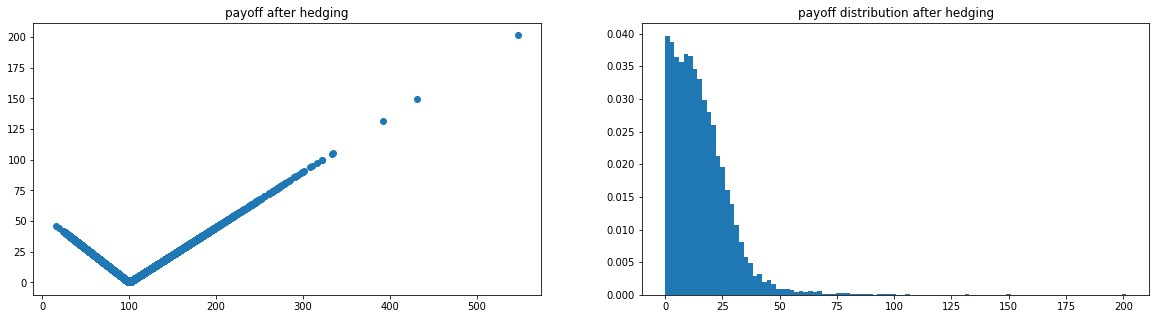

In [71]:
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(121)
plt.title('payoff after hedging')

ax2 = fig.add_subplot(122)
ax1.scatter(S, np.maximum(0, S-K) - delta * (S-S_0))
plt.title('payoff distribution after hedging')
ax2.hist(np.maximum(0, S-K) - delta * (S-S_0), bins=100, density=True)

plt.show()

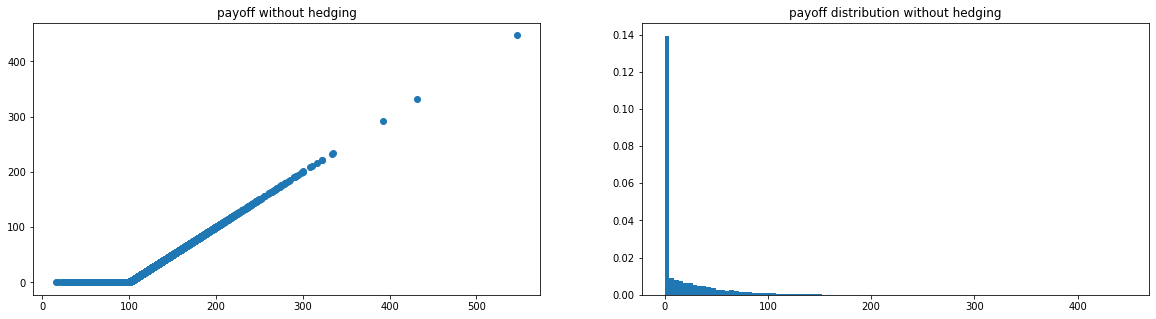

In [72]:
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(121)
plt.title('payoff without hedging')
ax2 = fig.add_subplot(122)
ax1.scatter(S, np.maximum(0, S-K))
plt.title('payoff distribution without hedging')
ax2.hist(np.maximum(0, S-K), bins=100, density=True)

plt.show()